<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_carbohydrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')

#plot size
options(repr.plot.width=20, repr.plot.height=10)

In [5]:
# Read in data
url <- 'https://docs.google.com/spreadsheets/d/1wFGXHfcrVKMybtffrnMULbBBYBBHh0xigsHyFKRq9ew/edit?usp=sharing'
carb <- gsheet2tbl(url)
head(carb)

carbohydrate,age,weight,protein
<dbl>,<dbl>,<dbl>,<dbl>
33,33,100,14
40,47,92,15
37,49,135,18
27,35,144,12
30,46,140,15
43,52,101,15


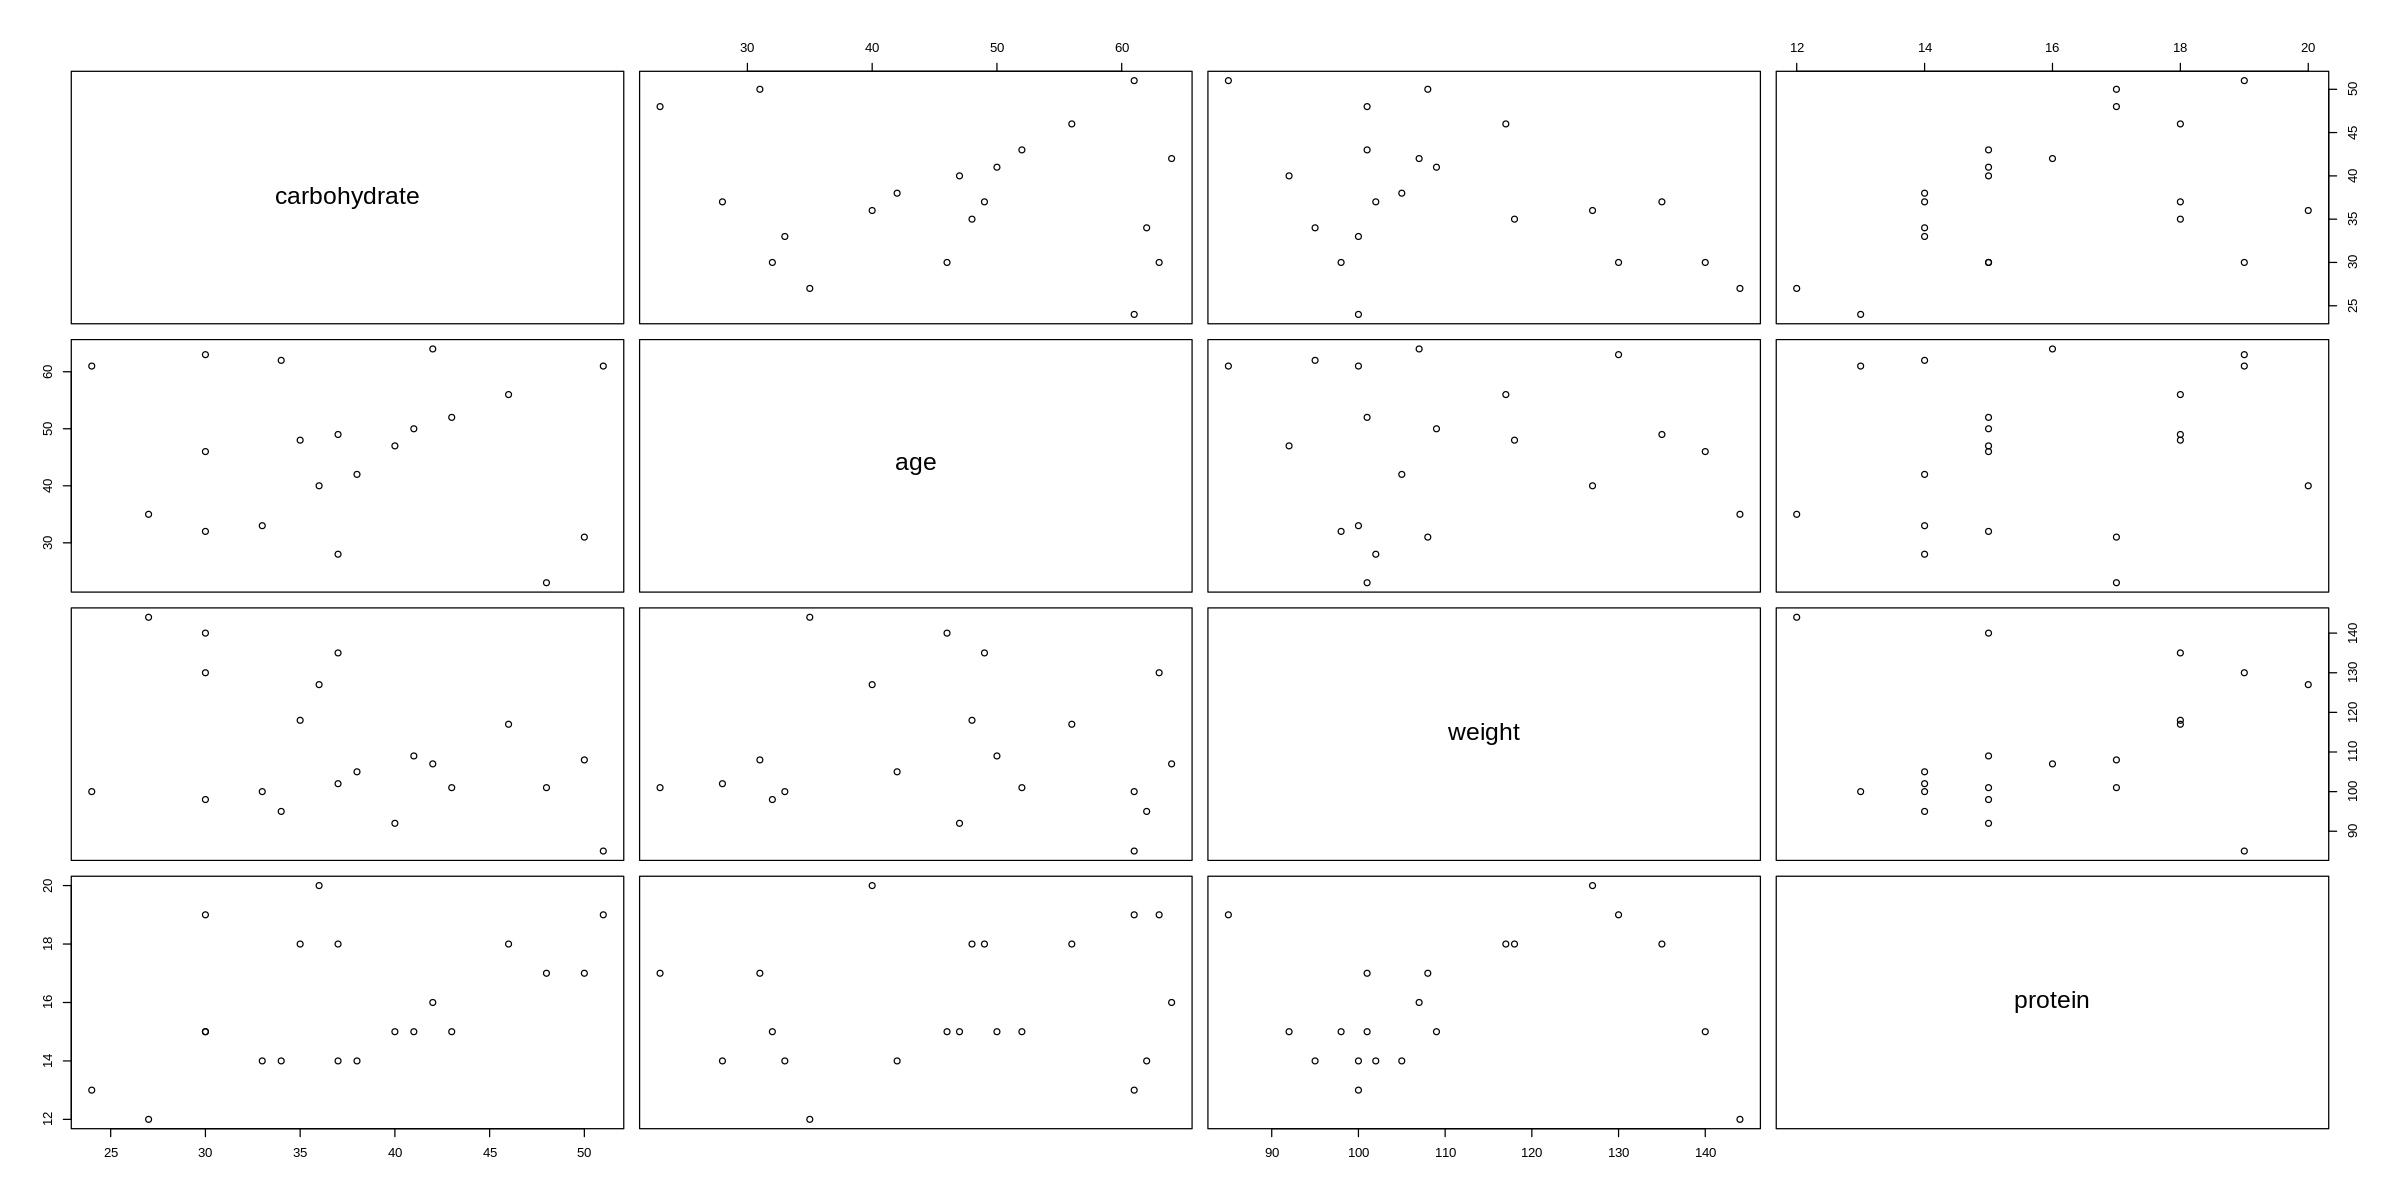

In [6]:
pairs(carb)